In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('owid-covid-data.csv')

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173481,ZWE,Africa,Zimbabwe,2022-03-28,245927.0,107.0,177.429,5438.0,0.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
173482,ZWE,Africa,Zimbabwe,2022-03-29,246042.0,115.0,193.857,5439.0,1.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
173483,ZWE,Africa,Zimbabwe,2022-03-30,246182.0,140.0,174.857,5440.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
173484,ZWE,Africa,Zimbabwe,2022-03-31,246286.0,104.0,156.000,5444.0,4.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173486 entries, 0 to 173485
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    173486 non-null  object 
 1   continent                                   163179 non-null  object 
 2   location                                    173486 non-null  object 
 3   date                                        173486 non-null  object 
 4   total_cases                                 169449 non-null  float64
 5   new_cases                                   169289 non-null  float64
 6   new_cases_smoothed                          167296 non-null  float64
 7   total_deaths                                151386 non-null  float64
 8   new_deaths                                  151414 non-null  float64
 9   new_deaths_smoothed                         149257 non-null  float64
 

In [5]:
df = df.drop(df.columns[[0,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,37,43,47,48,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66]], axis=1)

In [6]:
df_world = df[df['location'] == 'World']
df_world

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population_density
170475,NaN,World,2020-01-22,557.0,0.0,NaN,17.0,0.0,NaN,0.071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.045
170476,NaN,World,2020-01-23,657.0,100.0,NaN,18.0,1.0,NaN,0.083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.045
170477,NaN,World,2020-01-24,944.0,287.0,NaN,26.0,8.0,NaN,0.120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.045
170478,NaN,World,2020-01-25,1437.0,493.0,NaN,42.0,16.0,NaN,0.182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.045
170479,NaN,World,2020-01-26,2120.0,683.0,NaN,56.0,14.0,NaN,0.269,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171271,NaN,World,2022-03-28,483223253.0,1493115.0,1586314.429,6128559.0,3998.0,4895.857,61361.950,...,4.536192e+09,22181565.0,18040275.0,142.46,64.35,57.60,2291.0,3873544.0,0.049,58.045
171272,NaN,World,2022-03-29,484973548.0,1750295.0,1554156.714,6133312.0,5020.0,4912.857,61584.211,...,4.543215e+09,22922049.0,18614136.0,142.79,64.37,57.69,2364.0,3813782.0,0.048,58.045
171273,NaN,World,2022-03-30,486563304.0,1589756.0,1527972.857,6138350.0,5038.0,4798.571,61786.085,...,4.549125e+09,23711789.0,18824779.0,143.01,64.41,57.77,2390.0,3713218.0,0.047,58.045
171274,NaN,World,2022-03-31,488437812.0,1874508.0,1545464.143,6143147.0,4797.0,4729.286,62024.119,...,4.565219e+09,19097060.0,18699861.0,143.39,64.49,57.97,2375.0,3655819.0,0.046,58.045


# Analysis of Worldwide Dataset

In [7]:
df_world=df_world.drop(columns=['continent'])

In [8]:
df_world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 170475 to 171275
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   location                                    801 non-null    object 
 1   date                                        801 non-null    object 
 2   total_cases                                 801 non-null    float64
 3   new_cases                                   801 non-null    float64
 4   new_cases_smoothed                          795 non-null    float64
 5   total_deaths                                801 non-null    float64
 6   new_deaths                                  801 non-null    float64
 7   new_deaths_smoothed                         795 non-null    float64
 8   total_cases_per_million                     801 non-null    float64
 9   new_cases_per_million                       801 non-null    float64
 10  new_ca

In [9]:
df_world = df_world.dropna()
df_world

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population_density
170801,World,2020-12-13,72441494.0,539579.0,629043.857,1672139.0,7942.0,11130.286,9198.960,68.518,...,5.929000e+03,0.0,2.0,0.00,0.00,0.00,0.0,2.0,0.000,58.045
170802,World,2020-12-14,72992493.0,550999.0,631585.000,1680971.0,8832.0,11190.000,9268.928,69.968,...,6.049000e+03,4582.0,4584.0,0.00,0.00,0.00,1.0,4423.0,0.000,58.045
170803,World,2020-12-15,73639809.0,647316.0,634038.000,1694337.0,13366.0,11360.571,9351.128,82.199,...,6.314000e+03,50508.0,27906.0,0.02,0.00,0.00,4.0,26660.0,0.000,58.045
170804,World,2020-12-16,74357968.0,718193.0,641192.286,1708438.0,14101.0,11546.143,9442.323,91.200,...,6.791000e+03,162244.0,263804.0,0.02,0.00,0.00,33.0,73674.0,0.001,58.045
170805,World,2020-12-17,75097042.0,739074.0,650553.286,1721766.0,13328.0,11664.286,9536.174,93.851,...,7.544000e+03,276913.0,315023.0,0.03,0.01,0.00,40.0,123768.0,0.002,58.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171270,World,2022-03-27,481730138.0,912111.0,1583086.714,6124561.0,2361.0,5020.286,61172.347,115.824,...,4.528201e+09,14500575.0,16983975.0,142.19,64.33,57.50,2157.0,3968966.0,0.050,58.045
171271,World,2022-03-28,483223253.0,1493115.0,1586314.429,6128559.0,3998.0,4895.857,61361.950,189.603,...,4.536192e+09,22181565.0,18040275.0,142.46,64.35,57.60,2291.0,3873544.0,0.049,58.045
171272,World,2022-03-29,484973548.0,1750295.0,1554156.714,6133312.0,5020.0,4912.857,61584.211,222.261,...,4.543215e+09,22922049.0,18614136.0,142.79,64.37,57.69,2364.0,3813782.0,0.048,58.045
171273,World,2022-03-30,486563304.0,1589756.0,1527972.857,6138350.0,5038.0,4798.571,61786.085,201.875,...,4.549125e+09,23711789.0,18824779.0,143.01,64.41,57.77,2390.0,3713218.0,0.047,58.045


<AxesSubplot:>

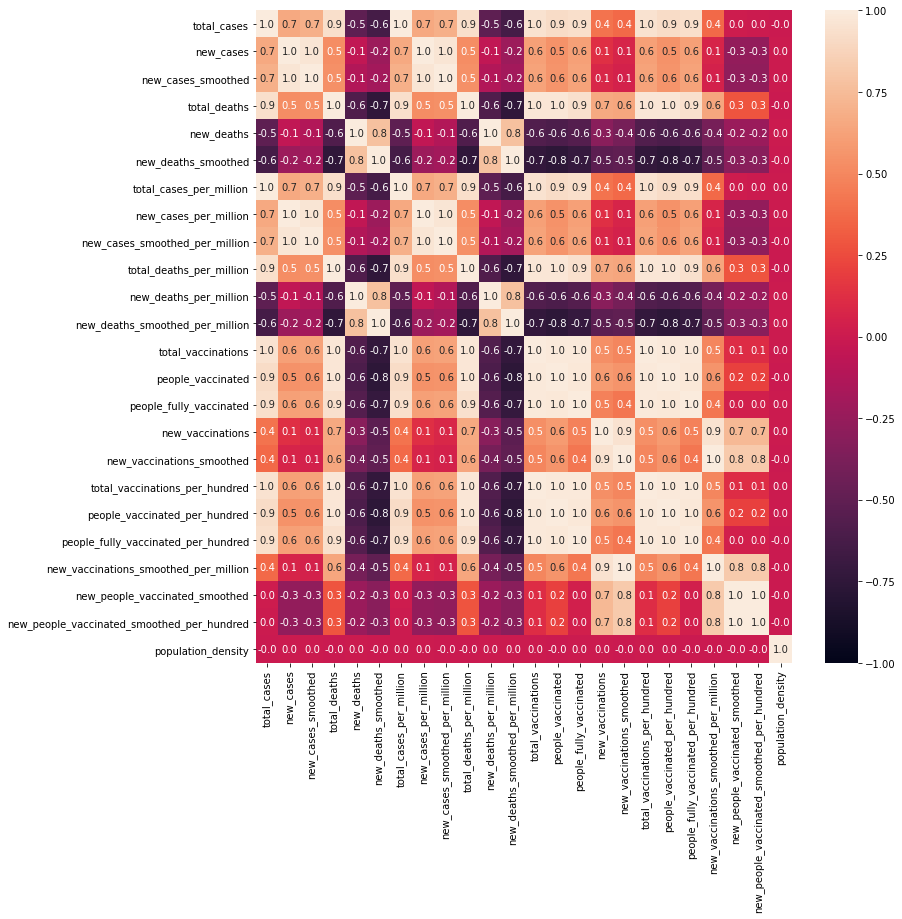

In [10]:
df_new = df_world
f = plt.figure(figsize=(12, 12))
numDF = pd.DataFrame(df_new)
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot=True,fmt = ".1f")

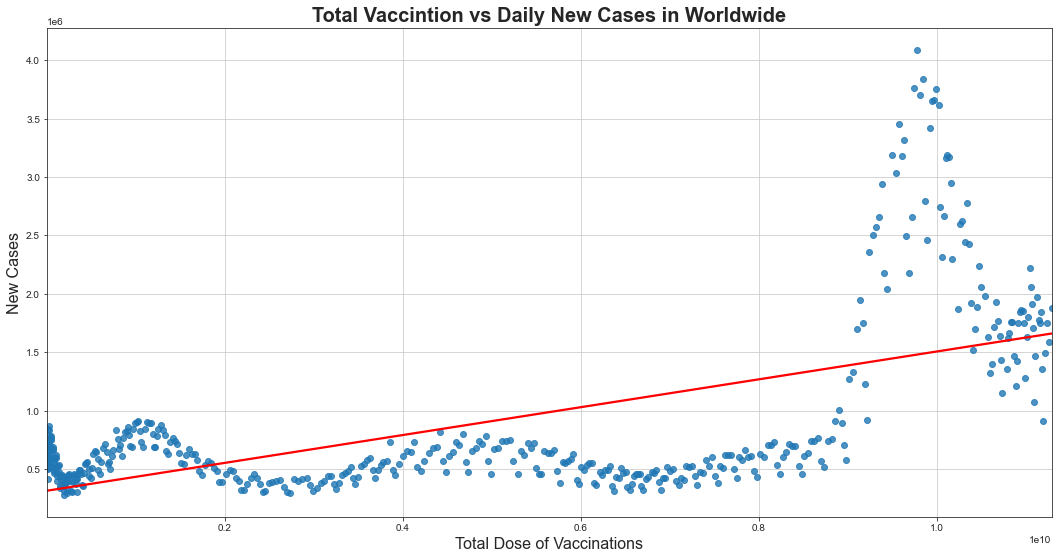

In [11]:
f = plt.figure(figsize=(18, 9))
sb.set_style("ticks",{'axes.grid' : True})
ax = sb.regplot(x = 'total_vaccinations' ,y = 'new_cases', data = df_world,ci = None, line_kws = dict(color='red'))
ax.set_title('Total Vaccintion vs Daily New Cases in Worldwide', fontsize = 20, weight='bold')
ax.set_xlabel('Total Dose of Vaccinations', fontsize = 16)
ax.set_ylabel('New Cases', fontsize = 16)
plt.show()

In [12]:
df_world['total_vaccinations'].corr(df_world['new_cases'])

0.6130839954362804

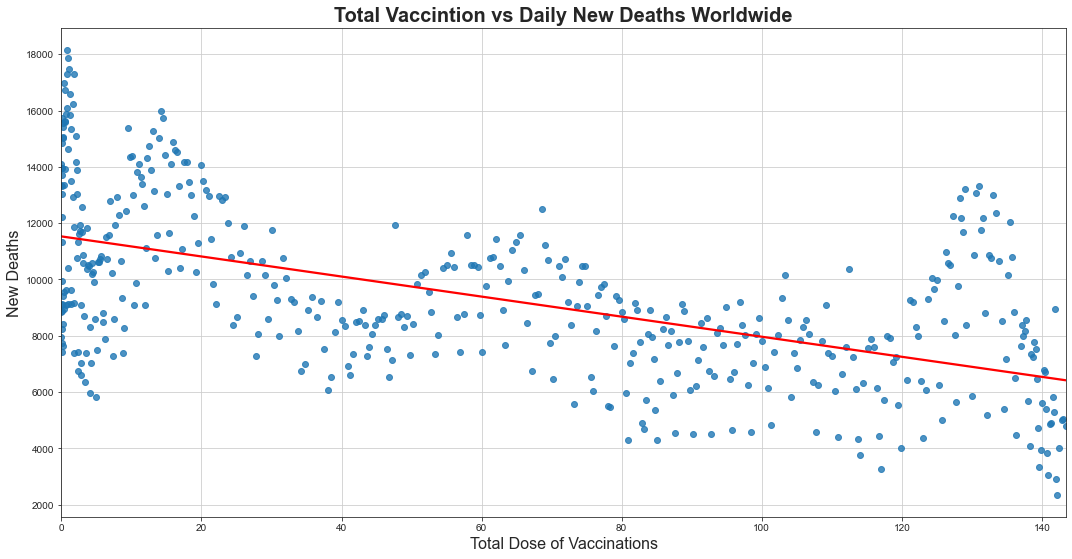

In [13]:
f = plt.figure(figsize=(18, 9))
sb.set_style("ticks",{'axes.grid' : True})
ax = sb.regplot(x = 'total_vaccinations_per_hundred' ,y = 'new_deaths', data = df_world,ci = None, line_kws = dict(color='red'))
ax.set_title('Total Vaccintion vs Daily New Deaths Worldwide', fontsize = 20, weight='bold')
ax.set_xlabel('Total Dose of Vaccinations', fontsize = 16)
ax.set_ylabel('New Deaths', fontsize = 16)
plt.show()

In [14]:
df_world['total_vaccinations'].corr(df_world['new_deaths'])

-0.5750226649394342

# Analysis of Singapore Dataset

In [15]:
df_singapore = df.loc[df['location']=='Singapore']
df_singapore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 140122 to 140921
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   continent                                   800 non-null    object 
 1   location                                    800 non-null    object 
 2   date                                        800 non-null    object 
 3   total_cases                                 800 non-null    float64
 4   new_cases                                   800 non-null    float64
 5   new_cases_smoothed                          794 non-null    float64
 6   total_deaths                                742 non-null    float64
 7   new_deaths                                  742 non-null    float64
 8   new_deaths_smoothed                         736 non-null    float64
 9   total_cases_per_million                     800 non-null    float64
 10  new_ca

In [16]:
df_singapore = df_singapore.dropna()
df_singapore

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population_density
140470,Asia,Singapore,2021-01-05,58749.0,28.0,29.571,29.0,0.0,0.000,10772.517,...,2.0,14.0,10.0,0.00,0.00,0.00,2.0,10.0,0.000,7915.731
140471,Asia,Singapore,2021-01-06,58780.0,31.0,30.143,29.0,0.0,0.000,10778.202,...,4.0,13.0,11.0,0.00,0.00,0.00,2.0,10.0,0.000,7915.731
140472,Asia,Singapore,2021-01-07,58813.0,33.0,30.571,29.0,0.0,0.000,10784.253,...,6.0,18.0,13.0,0.00,0.00,0.00,2.0,12.0,0.000,7915.731
140473,Asia,Singapore,2021-01-08,58836.0,23.0,29.571,29.0,0.0,0.000,10788.470,...,9.0,732.0,116.0,0.02,0.02,0.00,21.0,115.0,0.002,7915.731
140474,Asia,Singapore,2021-01-09,58865.0,29.0,29.000,29.0,0.0,0.000,10793.788,...,11.0,402.0,173.0,0.02,0.02,0.00,32.0,172.0,0.003,7915.731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140913,Asia,Singapore,2022-03-24,1053139.0,8478.0,9545.571,1226.0,6.0,6.286,193108.956,...,4952411.0,6636.0,8570.0,252.81,91.76,90.81,1571.0,502.0,0.009,7915.731
140914,Asia,Singapore,2022-03-25,1060723.0,7584.0,9115.571,1239.0,13.0,6.857,194499.597,...,4955615.0,10984.0,8283.0,253.01,91.77,90.87,1519.0,472.0,0.009,7915.731
140915,Asia,Singapore,2022-03-26,1067157.0,6434.0,8571.286,1246.0,7.0,7.429,195679.368,...,4959603.0,11405.0,8179.0,253.22,91.78,90.94,1500.0,459.0,0.008,7915.731
140916,Asia,Singapore,2022-03-27,1067157.0,0.0,7448.571,1250.0,4.0,7.429,195679.368,...,4962492.0,7929.0,8133.0,253.37,91.78,90.99,1491.0,451.0,0.008,7915.731


<AxesSubplot:>

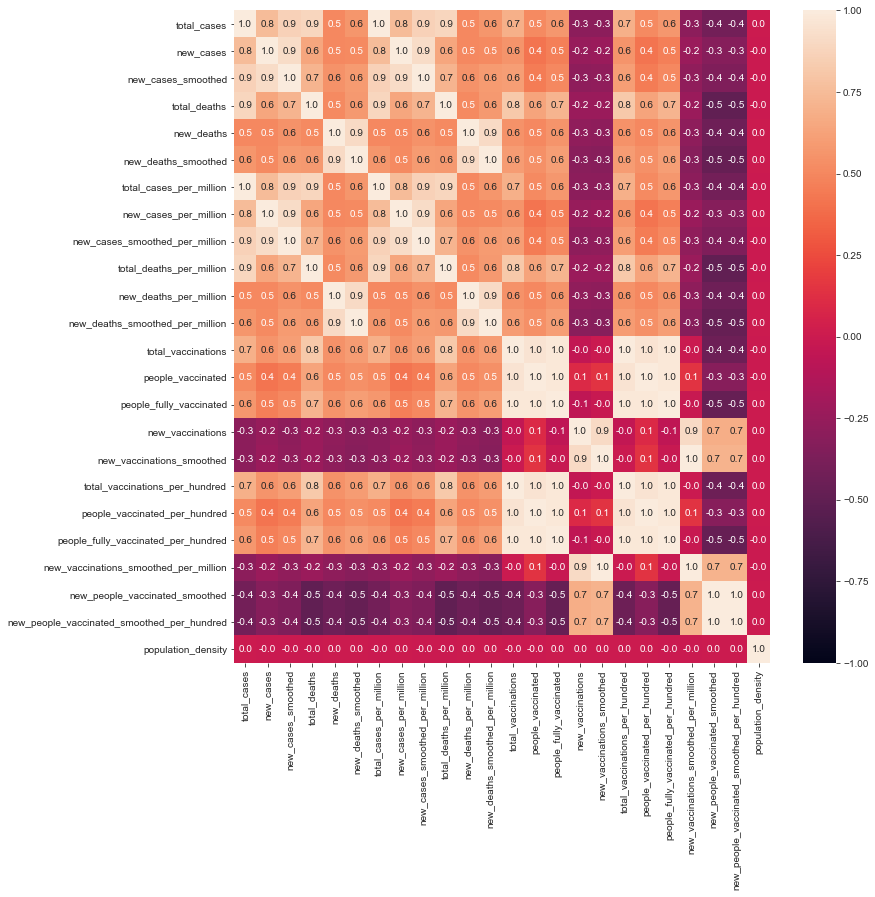

In [17]:
f = plt.figure(figsize=(12, 12))
numDF = pd.DataFrame(df_singapore)
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot=True, fmt = ".1f")
#heatmap singapore after nan dropped

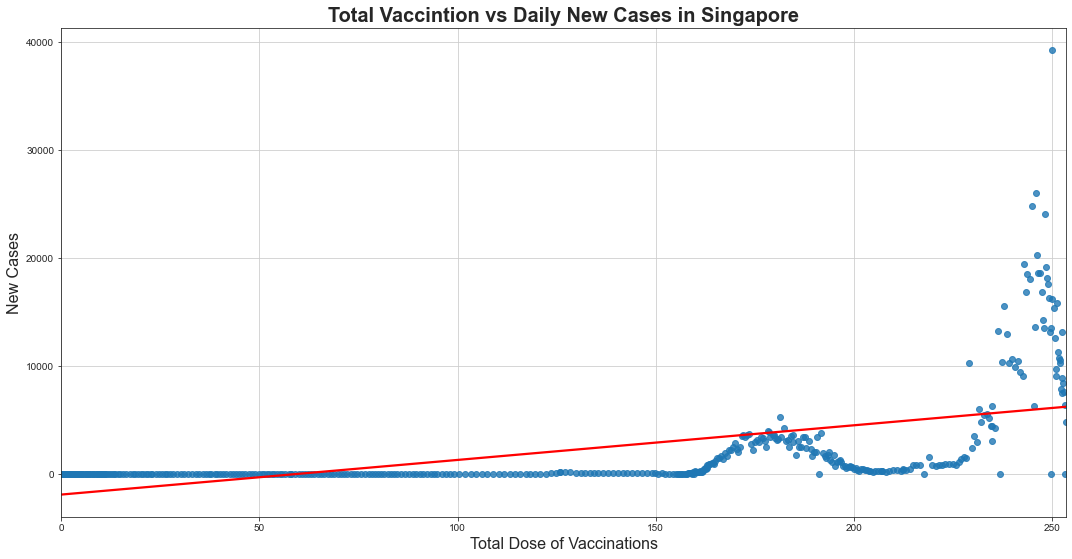

In [18]:
f = plt.figure(figsize=(18, 9))
sb.set_style("ticks",{'axes.grid' : True})
ax = sb.regplot(x = 'total_vaccinations_per_hundred' ,y = 'new_cases', data = df_singapore,ci = None, line_kws = dict(color='red'))
ax.set_title('Total Vaccintion vs Daily New Cases in Singapore', fontsize = 20, weight='bold')
ax.set_xlabel('Total Dose of Vaccinations', fontsize = 16)
ax.set_ylabel('New Cases', fontsize = 16)
plt.show()

In [19]:
df_singapore['total_vaccinations'].corr(df_singapore['new_cases'])

0.5597182484250899

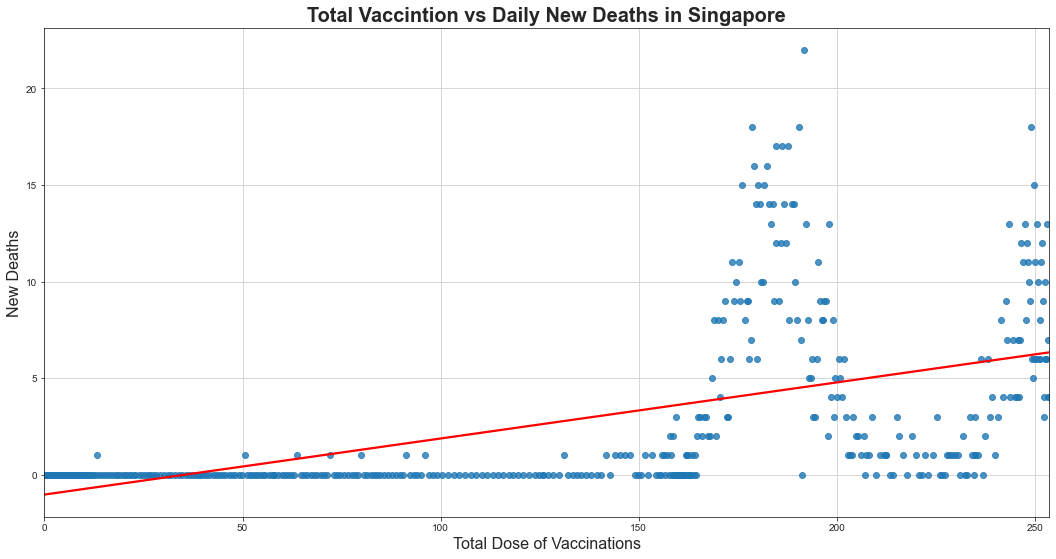

In [20]:
f = plt.figure(figsize=(18, 9))
sb.set_style("ticks",{'axes.grid' : True})
ax = sb.regplot(x = 'total_vaccinations_per_hundred' ,y = 'new_deaths', data = df_singapore,ci = None, line_kws = dict(color='red'))
ax.set_title('Total Vaccintion vs Daily New Deaths in Singapore', fontsize = 20, weight='bold')
ax.set_xlabel('Total Dose of Vaccinations', fontsize = 16)
ax.set_ylabel('New Deaths', fontsize = 16)
plt.show()

In [21]:
df_singapore['total_vaccinations'].corr(df_singapore['new_deaths'])

0.5508562739750715